Notebook to test the functions from local.py and transformation.py

In [1]:

%load_ext tensorboard

import tifffile
import numpy as np
from pathlib import Path
from typing import Union, List, Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch import no_grad, cuda
from transformation import augment_batch, normalize, denormalize
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWritertransformation
from datetime import datetime

import sys
import os
sys.path.append("/localscratch/devel/the_exceptionals/model/")
from unet import UNet
from helper import train

sys.path.append("/localscratch/devel/the_exceptionals/util/")
from visualize import show_random_dataset_image_with_prediction

sys.path.append("/localscratch/devel/the_exceptionals/data/")
from local import (
    CellDataset,
    show_random_dataset_image,
    show_one_image
)

In [41]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [34]:
img_dir = "/localscratch/exceptionals/train_images2D/images"
mask_dir = "/localscratch/exceptionals/train_images2D/masks"

trainData = CellDataset(img_dir = img_dir, 
                       mask_dir = mask_dir)

In [35]:
print(testdata.images)

['MAX_C4-26012022_Label48_t1strep_100x_0.21_03_POS_current.vsi - 405, 488, 561, 640.tif.scaled.tif', 'MAX_C3-03022022_Label49_t1_100x_0.21_03_POS_current.vsi - 405, 488, 640.tif scaled.tif', 'MAX_C3-03022022_Label49_t3_100x_0.21_01_POS_current.vsi - 405, 488, 640.tif scaled.tif', 'MAX_C3-03022022_Label49_t3_100x_0.21_03_POS_current.vsi - 405, 488, 640.tif scaled.tif', 'MAX_C3-03022022_Label49_t3_100x_0.21_04_POS_current.vsi - 405, 488, 640.tif scaled.tif', 'MAX_C4-02122021_Label43_label1_343_0.25_100x_0.21_01.vsi - 405, 488, 561, 640.tif.scaled.tif', 'MAX_C4-02122021_Label43_label1_343_0.25_100x_0.21_03.vsi - 405, 488, 561, 640.tif.scaled.tif', 'MAX_C4-03022022_Label49_t2_100x_0.21_03_POS_current.vsi - 405, 488, 561, 640.tif scaled.tif', 'MAX_C4-03022022_Label49_t2_100x_0.21_04_POS_current.vsi - 405, 488, 561, 640.tif scaled.tif', 'MAX_C4-12012022_Label46_367L_BCd16low_100x_0.21_02.vsi - 405, 488, 561, 640.tif scaled.tif', 'MAX_C4-12012022_Label46_367L_Cd16_100x_0.21_01.vsi - 405, 488,

Image size is {torch.Size([2304, 2304])}


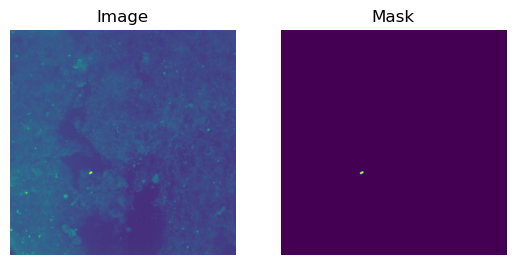

In [36]:
show_random_dataset_image(testdata)

In [47]:
train_loader=DataLoader(trainData, batch_size=5, shuffle=True, num_workers=8)

In [49]:
unet = UNet(depth=4, in_channels=1, out_channels=1, num_fmaps=2).to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(unet.parameters())

for epoch in range(100):
    train(unet, train_loader, optimizer, loss, epoch, device=device)

Train Epoch: 0 [0/20 (0%)]	Loss: 0.071089
Train Epoch: 1 [0/20 (0%)]	Loss: 0.068861
Train Epoch: 2 [0/20 (0%)]	Loss: 0.066091
Train Epoch: 3 [0/20 (0%)]	Loss: 0.063146
Train Epoch: 4 [0/20 (0%)]	Loss: 0.055093
Train Epoch: 5 [0/20 (0%)]	Loss: 0.029845
Train Epoch: 6 [0/20 (0%)]	Loss: 0.029548
Train Epoch: 7 [0/20 (0%)]	Loss: 0.016084
Train Epoch: 8 [0/20 (0%)]	Loss: 0.007913
Train Epoch: 9 [0/20 (0%)]	Loss: 0.004581
Train Epoch: 10 [0/20 (0%)]	Loss: 0.004440
Train Epoch: 11 [0/20 (0%)]	Loss: 0.003245
Train Epoch: 12 [0/20 (0%)]	Loss: 0.002760
Train Epoch: 13 [0/20 (0%)]	Loss: 0.002083
Train Epoch: 14 [0/20 (0%)]	Loss: 0.001926
Train Epoch: 15 [0/20 (0%)]	Loss: 0.001449
Train Epoch: 16 [0/20 (0%)]	Loss: 0.001552
Train Epoch: 17 [0/20 (0%)]	Loss: 0.001069
Train Epoch: 18 [0/20 (0%)]	Loss: 0.001146
Train Epoch: 19 [0/20 (0%)]	Loss: 0.000980
Train Epoch: 20 [0/20 (0%)]	Loss: 0.000934
Train Epoch: 21 [0/20 (0%)]	Loss: 0.000842
Train Epoch: 22 [0/20 (0%)]	Loss: 0.000827
Train Epoch: 23 [0/20

MSE loss: 0.00012235469
Image size is {torch.Size([2304, 2304])}


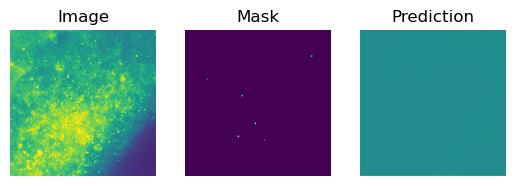

TypeError: cannot unpack non-iterable NoneType object

In [98]:
img, mask, prediction = show_random_dataset_image_with_prediction(trainData, unet, device)